# Career Shifterz
Nama :
- Auviera Pascafiwi
- Clara Natalie
- Fahmy Rafian S
- M Fu’ad Saifuddin
- Indra Maulidin
- Luthfan Zulfahmi
- Wenvint

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('D:\Rakamyn DS Batch 23\Final Project\Loan Prediction\Training Data.csv')
df.head(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
df['Risk_Flag'] = df['Risk_Flag'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  object
dtypes: int64(6), object(7)
memory usage: 25.0+ MB


Kolom Risk_Flag sudah diubah tipe datanya menjadi String/Object.

# Data Cleansing

## A. Handle missing values

In [ ]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

Tidak ada Missing Values pada Dataset ini.

## B. Handle duplicated data

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Id'].duplicated().sum()

0

In [ ]:
df[df.duplicated(keep=False)]

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag


Tidak ada Data Duplicates pada Dataset.

## C. Handle Outliers

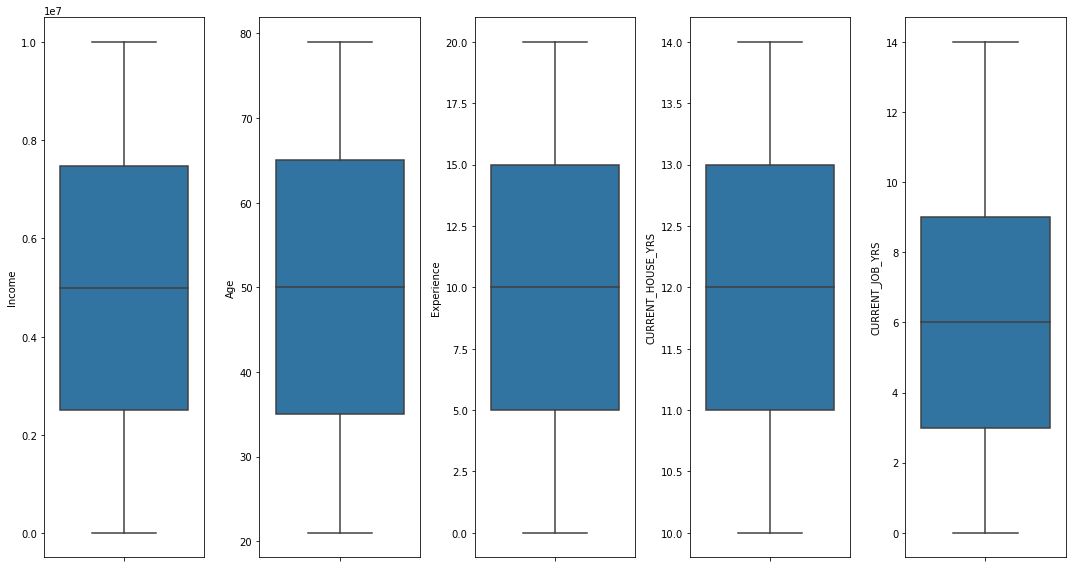

In [ ]:
plt.figure(figsize=(15,8))
features = ['Income','Age','Experience','CURRENT_HOUSE_YRS','CURRENT_JOB_YRS']
for i in range(0,len(features)):
    plt.subplot(1,len(features),i+1)
    sns.boxplot(y=df[features[i]])
    #plt.xlabel(features[i])
    plt.tight_layout()

Tidak ada Outliers untuk semua Data Numerical.

## D. Feature Transformation

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Normalization

In [ ]:
df['income_norm'] = MinMaxScaler().fit_transform(df['Income'].values.reshape(len(df),1))

In [ ]:
df['age_norm'] = MinMaxScaler().fit_transform(df['Age'].values.reshape(len(df),1))

In [ ]:
df['experience_norm'] = MinMaxScaler().fit_transform(df['Experience'].values.reshape(len(df),1))

In [ ]:
df['current_house_yrs_norm'] = MinMaxScaler().fit_transform(df['CURRENT_HOUSE_YRS'].values.reshape(len(df),1))

In [ ]:
df['current_job_yrs_norm'] = MinMaxScaler().fit_transform(df['CURRENT_JOB_YRS'].values.reshape(len(df),1))

In [ ]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,income_norm,age_norm,experience_norm,current_house_yrs_norm,current_job_yrs_norm
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0.129487,0.034483,0.15,0.75,0.214286
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,0.757206,0.327586,0.50,0.75,0.642857
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,0.398564,0.775862,0.20,0.00,0.285714
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,0.625263,0.344828,0.10,0.50,0.142857
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,0.576454,0.448276,0.55,1.00,0.214286


### Standardization

In [ ]:
df['current_job_yrs_std'] = StandardScaler().fit_transform(df['CURRENT_JOB_YRS'].values.reshape(len(df),1))

## Cek Data

In [ ]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,income_norm,age_norm,experience_norm,current_house_yrs_norm,current_job_yrs_norm,current_job_yrs_std
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0.129487,0.034483,0.15,0.75,0.214286,-0.914131
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,0.757206,0.327586,0.50,0.75,0.642857,0.731036
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,0.398564,0.775862,0.20,0.00,0.285714,-0.639936
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,0.625263,0.344828,0.10,0.50,0.142857,-1.188325
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,0.576454,0.448276,0.55,1.00,0.214286,-0.914131


In [ ]:
df[['income_norm','age_norm','experience_norm','current_house_yrs_norm','current_job_yrs_norm','current_job_yrs_std']].describe()

,income_norm,age_norm,experience_norm,current_house_yrs_norm,current_job_yrs_norm,current_job_yrs_std
count,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,2.520000e+05
mean,0.499198,0.499208,0.504222,0.499448,0.452420,1.604170e-16
std,0.288130,0.294204,0.300129,0.349759,0.260504,1.000002e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.736714e+00
25%,0.249529,0.241379,0.250000,0.250000,0.214286,-9.141308e-01
50%,0.499557,0.500000,0.500000,0.500000,0.428571,-9.154724e-02
75%,0.747495,0.758621,0.750000,0.750000,0.642857,7.310363e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.102009e+00


<AxesSubplot:xlabel='CURRENT_JOB_YRS', ylabel='Density'>

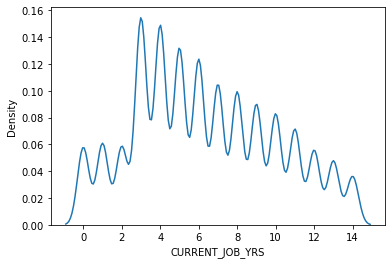

In [ ]:
sns.kdeplot(x='CURRENT_JOB_YRS',data=df)

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='CURRENT_JOB_YRS', ylabel='Density'>

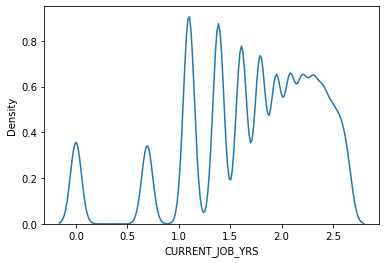

In [ ]:
sns.kdeplot(np.log(df['CURRENT_JOB_YRS']))

<AxesSubplot:xlabel='current_job_yrs_std', ylabel='Density'>

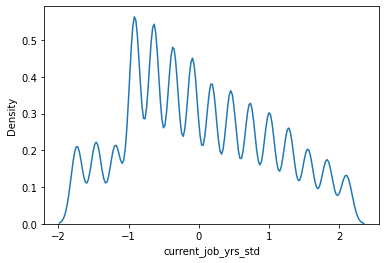

In [ ]:
sns.kdeplot(x='current_job_yrs_std', data=df)

Kesimpulan :
1. Untuk Feature data numerical sudah dilakukan __Normalization__ dan dapat dilihat untuk seluruh Feature Numerical sudah memiliki __nilai Rata - rata saling berdekatan__.
2. Untuk Feature Current_Job_Yrs karena bentuk distribusinya skewed (right skewed) maka sudah dilakukan Standardization untuk membuat distribusinya mendekati distribusi normal. Tetapi setelah dialkukan Standardization, distribusi feature tersebut tidak mengalami perubahan.

## E. Feature Encoding

In [ ]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,income_norm,age_norm,experience_norm,current_house_yrs_norm,current_job_yrs_norm,current_job_yrs_std
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0.129487,0.034483,0.15,0.75,0.214286,-0.914131
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,0.757206,0.327586,0.50,0.75,0.642857,0.731036
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,0.398564,0.775862,0.20,0.00,0.285714,-0.639936
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,0.625263,0.344828,0.10,0.50,0.142857,-1.188325
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,0.576454,0.448276,0.55,1.00,0.214286,-0.914131


Akan dilakukan Label Encoding untuk Feature Married/Single dan Car_ownership & One-Hot ENcoding untuk Feature House_Ownership.

### Label Encoding

In [ ]:
mapping_m_s = {
    'single' : 0,
    'married' : 1
}

In [ ]:
df['Married/Single'] = df['Married/Single'].map(mapping_m_s)

In [ ]:
mapping_car = {
    'no' : 0,
    'yes' :1
}

In [ ]:
df['Car_Ownership'] = df['Car_Ownership'].map(mapping_car)

### One_hot Encoding

In [ ]:
house_category = pd.get_dummies(df['House_Ownership'], prefix='house')
house_category

,house_norent_noown,house_owned,house_rented
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
251995,0,0,1
251996,0,0,1
251997,0,0,1
251998,0,0,1


In [ ]:
df = df.join(house_category)
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Risk_Flag,income_norm,age_norm,experience_norm,current_house_yrs_norm,current_job_yrs_norm,current_job_yrs_std,house_norent_noown,house_owned,house_rented
0,1,1303834,23,3,0,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,...,0,0.129487,0.034483,0.15,0.75,0.214286,-0.914131,0,0,1
1,2,7574516,40,10,0,rented,0,Software_Developer,Parbhani,Maharashtra,...,0,0.757206,0.327586,0.50,0.75,0.642857,0.731036,0,0,1
2,3,3991815,66,4,1,rented,0,Technical_writer,Alappuzha,Kerala,...,0,0.398564,0.775862,0.20,0.00,0.285714,-0.639936,0,0,1
3,4,6256451,41,2,0,rented,1,Software_Developer,Bhubaneswar,Odisha,...,1,0.625263,0.344828,0.10,0.50,0.142857,-1.188325,0,0,1
4,5,5768871,47,11,0,rented,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,...,1,0.576454,0.448276,0.55,1.00,0.214286,-0.914131,0,0,1


Kesimpulan : 
1. Sudah dilakukan Feature Encoding untuk feature categorical.
2. Untuk feature Married/Single dan Car_Ownership menggunakan Label Encoding karena disticnt values = 2.
3. Untuk feature House_Ownership menggunakn One-Hot Encoding karena distinct values > 2 dan tidak bersifat ordinal.

## F. Imbalance Class

In [ ]:
from imblearn import under_sampling, over_sampling

In [ ]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag', 'income_norm',
       'age_norm', 'experience_norm', 'current_house_yrs_norm',
       'current_job_yrs_norm', 'current_job_yrs_std', 'house_norent_noown',
       'house_owned', 'house_rented'],
      dtype='object')

In [ ]:
features = ['Married/Single','Car_Ownership','income_norm',
            'age_norm', 'experience_norm', 'current_house_yrs_norm',
            'current_job_yrs_norm', 'house_norent_noown',
            'house_owned', 'house_rented']

In [ ]:
X = df[features]
y = df['Risk_Flag']

In [ ]:
print(X.shape)
print(y.shape)

(252000, 10)
(252000,)


In [ ]:
y.value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

Terlihat terdapat ketimpangan kelas antara Label 0 dengan Label 1 pada Risk_FLag.

In [ ]:
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X,y)

In [ ]:
print(X_over_SMOTE.shape)
print(y_over_SMOTE.shape)

(442008, 10)
(442008,)


In [ ]:
y_over_SMOTE.value_counts()

0    221004
1    221004
Name: Risk_Flag, dtype: int64

Kelas menjadi seimbang melalui duplikat Oversampling SMOTE.

# Feature Engineering

## A. Feature Selection

In [ ]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag', 'income_norm',
       'age_norm', 'experience_norm', 'current_house_yrs_norm',
       'current_job_yrs_norm', 'current_job_yrs_std', 'house_norent_noown',
       'house_owned', 'house_rented'],
      dtype='object')

Berdasarkan Proses EDA dan Data CLeansing yang sudah dilakukan, kami akan __membuang__ beberapa __feature__ yang __kurang relevan atau redundan__ seperti :
1. __Id__ : Karena sifatnya hanya sebagai identitas user.
2. __Income, Age, Experince dan CURRENT_HOUSE_YRS__ : Sudah dilakukan Normalization dari feature tersebut, sehingga akan menggunakan feature hasil dari normalization tersebut.
3. __House_Ownership__ : Sudah dilakukan One-Hot Encoding dari feature tersebut, sehinnga akan menggunakn feature hasil One_hot Encdoing tersebut.
4. __Profession, CITY dan STATE__ : Akan didrop karena nilai kategorikal masing - masing feature terlalu banyak sehingga jika dilakukan Feature Encoding akan membuat Data memiliki terlalu banyak Feature yang tidak terlalu dibutuhkan saat Modelling.
5. __CURRENT_JOB_YRS__ : Memiliki korelasi yang cukup kuat dan redundant dengan feature __Experience__ , namun memiki korelasi yang lebih lemah terhadap __Risk_Flag__ dibandingkan dengan Feature __Experience__ sehingga akan di drop.

Berdasarkan kesimpulan diatas, sisa Feature selain feature diatas akan digunakan dalam proses Modelling dengan Risk_FLag akan dijadikan sebagai Target dari Modelling.

## B. Feature Extraction

In [ ]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Risk_Flag,income_norm,age_norm,experience_norm,current_house_yrs_norm,current_job_yrs_norm,current_job_yrs_std,house_norent_noown,house_owned,house_rented
0,1,1303834,23,3,0,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,...,0,0.129487,0.034483,0.15,0.75,0.214286,-0.914131,0,0,1
1,2,7574516,40,10,0,rented,0,Software_Developer,Parbhani,Maharashtra,...,0,0.757206,0.327586,0.50,0.75,0.642857,0.731036,0,0,1
2,3,3991815,66,4,1,rented,0,Technical_writer,Alappuzha,Kerala,...,0,0.398564,0.775862,0.20,0.00,0.285714,-0.639936,0,0,1
3,4,6256451,41,2,0,rented,1,Software_Developer,Bhubaneswar,Odisha,...,1,0.625263,0.344828,0.10,0.50,0.142857,-1.188325,0,0,1
4,5,5768871,47,11,0,rented,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,...,1,0.576454,0.448276,0.55,1.00,0.214286,-0.914131,0,0,1


In [ ]:
df.describe()

,Id,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,income_norm,age_norm,experience_norm,current_house_yrs_norm,current_job_yrs_norm,current_job_yrs_std,house_norent_noown,house_owned,house_rented
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,0.102095,0.301587,6.333877,11.997794,0.499198,0.499208,0.504222,0.499448,0.452420,1.604170e-16,0.028508,0.051262,0.920230
std,72746.278255,2.878311e+06,17.063855,6.002590,0.302774,0.458948,3.647053,1.399037,0.288130,0.294204,0.300129,0.349759,0.260504,1.000002e+00,0.166419,0.220532,0.270937
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.736714e+00,0.000000,0.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,0.000000,0.000000,3.000000,11.000000,0.249529,0.241379,0.250000,0.250000,0.214286,-9.141308e-01,0.000000,0.000000,1.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,0.000000,0.000000,6.000000,12.000000,0.499557,0.500000,0.500000,0.500000,0.428571,-9.154724e-02,0.000000,0.000000,1.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,0.000000,1.000000,9.000000,13.000000,0.747495,0.758621,0.750000,0.750000,0.642857,7.310363e-01,0.000000,0.000000,1.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,1.000000,1.000000,14.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.102009e+00,1.000000,1.000000,1.000000


In [ ]:
Q1 = df['Income'].quantile(0.25)
Q1

2503015.0

In [ ]:
Q3 = df['Income'].quantile(0.75)
Q3

7477502.0

In [ ]:
df['income_segmen'] = np.where(df['Income'] < Q1 ,'Low',np.where(df['Income']>Q3,'High','Medium'))
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,income_norm,age_norm,experience_norm,current_house_yrs_norm,current_job_yrs_norm,current_job_yrs_std,house_norent_noown,house_owned,house_rented,income_segmen
0,1,1303834,23,3,0,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,...,0.129487,0.034483,0.15,0.75,0.214286,-0.914131,0,0,1,Low
1,2,7574516,40,10,0,rented,0,Software_Developer,Parbhani,Maharashtra,...,0.757206,0.327586,0.50,0.75,0.642857,0.731036,0,0,1,High
2,3,3991815,66,4,1,rented,0,Technical_writer,Alappuzha,Kerala,...,0.398564,0.775862,0.20,0.00,0.285714,-0.639936,0,0,1,Medium
3,4,6256451,41,2,0,rented,1,Software_Developer,Bhubaneswar,Odisha,...,0.625263,0.344828,0.10,0.50,0.142857,-1.188325,0,0,1,Medium
4,5,5768871,47,11,0,rented,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,...,0.576454,0.448276,0.55,1.00,0.214286,-0.914131,0,0,1,Medium


In [ ]:
df['is_senior_customer'] = np.where(df['Age'] >= 56,'1','0')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,age_norm,experience_norm,current_house_yrs_norm,current_job_yrs_norm,current_job_yrs_std,house_norent_noown,house_owned,house_rented,income_segmen,is_senior_customer
0,1,1303834,23,3,0,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,...,0.034483,0.15,0.75,0.214286,-0.914131,0,0,1,Low,0
1,2,7574516,40,10,0,rented,0,Software_Developer,Parbhani,Maharashtra,...,0.327586,0.50,0.75,0.642857,0.731036,0,0,1,High,0
2,3,3991815,66,4,1,rented,0,Technical_writer,Alappuzha,Kerala,...,0.775862,0.20,0.00,0.285714,-0.639936,0,0,1,Medium,1
3,4,6256451,41,2,0,rented,1,Software_Developer,Bhubaneswar,Odisha,...,0.344828,0.10,0.50,0.142857,-1.188325,0,0,1,Medium,0
4,5,5768871,47,11,0,rented,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,...,0.448276,0.55,1.00,0.214286,-0.914131,0,0,1,Medium,0


Kesimpulan :
1. Telah dilakukan Feature Extraction dari Feature Income dimana dilakukan segmentasi terhadap nilai Income Customer berdasarkan :
    - Low : Income < Q1 (2503015.0)
    - High : Income > Q3 (7477502.0)
    - Medium : Q1 < Income < Q3
2. Telah dilakukan Feature Extraction dari Feature Age dimana dilakukan segmentasi Customer Senior berdasarkan usia dimana jika Usia CUstomer >= 56 maka termasuk Senior Customer.

## C. Feature Tambahan

Feature yang mungkin dibutuhkan dalam membantu proses Modelling :
1. Loan Amount : Karena semakin besar nilai pinjaman mungkin dapat mempengaruhi peluang Gagal Bayar.
2. Credit History : Karena semakin baik credit historynya maka semakin kecil resiko peluang Gagal Bayar.
3. Loan Tenure : Semakin panjang jangka waktu pelunasan yang disetujui oleh customer maka semakin kecil resiko peluang Gagal Bayar dikarenakan semakin panjang jangaka waktu pelunasannya maka semakin kecil biaya cicilan yang harus dibayarkan customer untuk setiap bulannya. 
4. Collateral : Jika user menambahkan collateral maka semakin kecil resiko peluang Gagal Bayar.
5. Education : Semakin tinggi pendidikan customer maka semakin kecil resiko peluang Gagal Bayar karena kemungkinan pengelolaan keuangan customer semakin baik dan lebih sadar akan konsekuensi jika Gagal Bayar.